# Importing our libraries

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from random import sample
from itertools import combinations
from statsmodels.stats.power import TTestIndPower, TTestPower
import math
import seaborn as sns
import scipy as sp
import pandas as pd
from matplotlib.lines import Line2D
import random
import statsmodels.api as sm
from itertools import combinations
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.stattools import jarque_bera
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

import num_model_all_combos as simple_test

# Creating and cleaning first dataframe

In [2]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# checking original df
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052


In [4]:
df.shape

(30155, 25)

In [5]:
# checking for nulls
df.isna().sum().sum()

46

In [6]:
# dropping nulls
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


# First Baseline Model

In [9]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [10]:
# creating baseline model based on highest .corr() to price (ran above)
X = df[['sqft_living']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
# viewing the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:10:20   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dropping Outliers in Sale Price

Dropping Outliers of price to within 3 standard deviations
- Only losing .6 percent of data

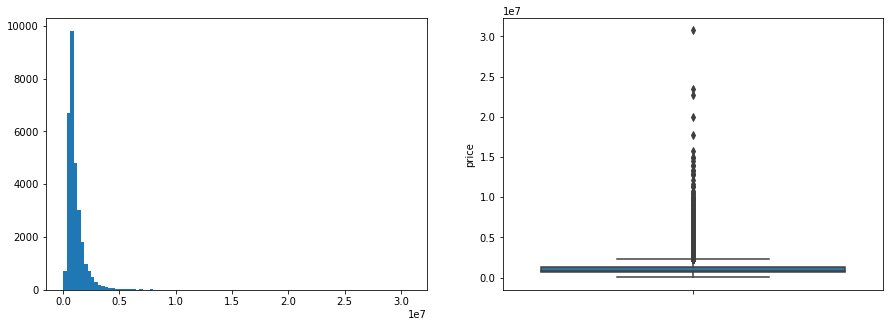

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df['price'], bins=100)
sns.boxplot(y =df['price']);

In [12]:
df_no_outliers = df[(df['price'] > np.percentile(df['price'], .3)) & (df['price'] < np.percentile(df['price'], 99.7))]

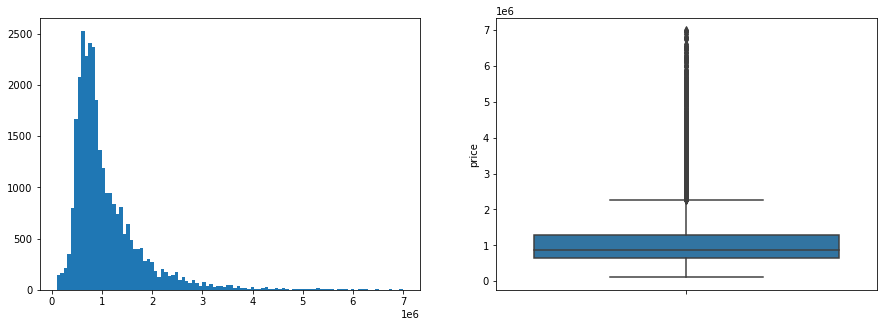

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df_no_outliers['price'], bins=100)
sns.boxplot(y =df_no_outliers['price']);

In [14]:
df_no_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.992700e+04,2.992700e+04,29927.000000,29927.000000,29927.000000,2.992700e+04,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000
mean,4.541369e+09,1.084893e+06,3.413673,2.330888,2105.252448,1.657447e+04,1.543222,1804.699368,473.342533,329.974338,215.996959,1975.169746,89.750627,47.328459,-121.321354
std,2.882145e+09,7.201688e+05,0.977299,0.877375,950.536144,5.997309e+04,0.567573,863.246578,572.185345,284.019578,242.024168,32.048907,413.920695,1.428233,5.714484
min,1.000055e+06,1.041860e+05,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.077450e+09,6.500000e+05,3.000000,2.000000,1420.000000,4.840000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.404785,-122.326340
50%,3.876002e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.460000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551305,-122.225740
75%,7.297200e+09,1.300000e+06,4.000000,3.000000,2610.000000,1.050700e+04,2.000000,2270.000000,940.000000,510.000000,312.000000,2003.000000,0.000000,47.670115,-122.116020
max,9.904000e+09,6.995000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4520.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


# Creating a new DF that now has features dropped
### These columns are not relevant for a variety of reasons listed below

- Drop ID: just a unique identifier, no helpful info
- Drop adress and lat/long: Location not important in this analysis
- Drop year renovated and year built: not relevant for remodeling purposes
- Drop date: last sale date is not relevant to remodeling home
- Drop sq ft lot: Cannot change lot size by remodeling home
- Waterfront: remove, we cannot change the house location to be moved next to water
- Greenbelt: remove, we cannot change the house location to be moved next to a greenbelt
- View: remove, we cannot change the house location to have a good view
- Sewer System: not likely to change your entire sewer system during a home remodel

In [15]:
# Dropping columns that seem to have little effect
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_built', 
                                  'date', 'sqft_lot', 'waterfront', 'greenbelt',
                                  'view', 'yr_renovated', 'sewer_system'], axis = 1)

In [16]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   floors         29927 non-null  float64
 5   nuisance       29927 non-null  object 
 6   condition      29927 non-null  object 
 7   grade          29927 non-null  object 
 8   heat_source    29927 non-null  object 
 9   sqft_above     29927 non-null  int64  
 10  sqft_basement  29927 non-null  int64  
 11  sqft_garage    29927 non-null  int64  
 12  sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 3.2+ MB


- categorical numeric:
    - floors

## Creating a DF with just continuous numerical data
### Dropping numerical categorical variables

In [17]:
# Creating new df with only numerical columns and 
# dropping numerical categorical columns
df_numeric = df_dropped.drop(['floors'], axis = 1).select_dtypes('number')

In [18]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   sqft_above     29927 non-null  int64  
 5   sqft_basement  29927 non-null  int64  
 6   sqft_garage    29927 non-null  int64  
 7   sqft_patio     29927 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.1 MB


In [19]:
df_numeric.head()

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_garage,sqft_patio
0,675000.0,4,1.0,1180,1180,0,0,40
1,920000.0,5,2.5,2770,1570,1570,0,240
2,311000.0,6,2.0,2880,1580,1580,0,0
3,775000.0,3,3.0,2160,1090,1070,200,270
4,592500.0,2,2.0,1120,1120,550,550,30


### Running baseline simple test after dropping outliers in sale price

In [20]:
simple_df = simple_test.simple_num_model_all_combos(df_numeric, 'price')

In [21]:
simple_df

,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,predictor_coef,predictor_p_val
2,sqft_living,0.430194,0.430175,0,38722.8,3.98806e-07,496.933,0
3,sqft_above,0.340758,0.340736,0,206018,9.94432e-151,486.993,0
1,bathrooms,0.267731,0.267706,0,94928.3,6.58601e-21,424716,0
0,bedrooms,0.11369,0.11366,0,236711,9.00519e-62,248466,0
6,sqft_patio,0.0958406,0.0958104,0,885918,0,921.192,0
5,sqft_garage,0.0880874,0.0880569,0,836566,0,752.563,0
4,sqft_basement,0.0566526,0.056621,0,943091,0,299.576,0


New baseline explains 43% of the variance compared to 37% in first baseline model.

### Running baseline multi regression after dropping outliers in sale price

In [22]:
multi_df, _ = simple_test.multi_num_model_all_combos(df_numeric, 'price')

The top three combos are: 
    - ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.45515322897467025 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage'] 
    	- adj_r2: 0.45287926866078276, 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.45246408806886096, 
    	- ratio of p-vals <.05: 100.0


In [23]:
multi_df.head(15)

,index,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,%p_val < .05
0,126,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.455281,0.455153,0,159179,0,100
1,119,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.452989,0.452879,0,168629,0,100
2,124,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.452574,0.452464,0,197896,0,100
3,120,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.451363,0.451253,0,169802,0,100
4,108,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.450018,0.449926,0,209788,0,100
5,121,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.449505,0.449394,0,199265,0,100
6,109,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.449396,0.449304,0,202106,0,100
7,98,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.449282,0.44919,0,178530,0,100
8,122,"[bedrooms, bathrooms, sqft_living, sqft_baseme...",0.449202,0.449091,0,209202,0,100
9,103,"[bedrooms, bathrooms, sqft_living, sqft_garage...",0.448785,0.448693,0,209065,0,100


In [24]:
for i in range(15):
    print(multi_df['column'][i+1])

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_garage', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_garage']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_b

In [25]:
y=df_numeric['price']
X = df_numeric[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     4130.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:10:40   Log-Likelihood:            -4.3707e+05
No. Observations:               29927   AIC:                         8.742e+05
Df Residuals:                   29920   BIC:                         8.742e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.686e+05   1.19e+04     14.157      0.000    1.45e+05    1.92e+05
bedrooms      -1.141e+05   4190.584    -27.227      0.000   -1.22e+05   -1.06e+05
bathrooms      7.178e+04   5630.209     12.748      0.000    6.07e+04    8.28e+04
sqft_living     312.4569     14.074     22.201      0.000     284.871     340.043
sqft_above      251.5799     14.078     17.870      0.000     223.986     279.174
sqft_basement   187.5610     10.362     18.100      0.000     167.251     207.871
sqft_garage    -188.3656     13.228    -14.240      0.000    -214.293    -162.438
==============================================================================
Omnibus:                    14738.126   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200670.805
Skew:                           2.033   Prob(JB):                         0.00
Kurtosis:                      15.016   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Selecting our multi baseline and general results
- simple regression has sqft_living as the best indicator
    - adjusted r score of 43%
- multi-linear regression has ['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement']
    - adjusted r score of 44.7%

## Standardizing data

In [26]:
# df_standardized = df_numeric.drop(['price'], axis=1).copy()
df_standardized = df_numeric.copy()


for col in df_standardized:
    df_standardized[col] = (df_standardized[col] - df_standardized[col].mean()) / df_standardized[col].std()
    
# df_standardized['price'] = df_numeric['price']
df_standardized.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_garage,sqft_patio
count,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04
mean,-1.025677e-16,-4.107458e-17,-1.120647e-16,1.479160e-16,1.119460e-16,1.567007e-17,-4.416111e-17,2.279283e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.361774e+00,-3.492967e+00,-2.656663e+00,-2.211649e+00,-2.088279e+00,-8.272539e-01,-1.161801e+00,-8.924603e-01
25%,-6.038763e-01,-4.232822e-01,-3.771348e-01,-7.209115e-01,-7.236627e-01,-8.272539e-01,-1.161801e+00,-7.271875e-01
50%,-3.122780e-01,-4.232822e-01,1.927472e-01,-1.948926e-01,-2.834640e-01,-8.272539e-01,2.465522e-01,-2.726875e-01
75%,2.986898e-01,5.999461e-01,7.626291e-01,5.310135e-01,5.390124e-01,8.155705e-01,6.338495e-01,3.966672e-01
max,8.206558e+00,9.809000e+00,9.310858e+00,1.394450e+01,1.257497e+01,7.072284e+00,1.144296e+01,1.716359e+01


### Running model again after standardizing

In [34]:
y=df_standardized['price']
X = df_standardized[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     4130.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:54:19   Log-Likelihood:                -33437.
No. Observations:               29927   AIC:                         6.689e+04
Df Residuals:                   29920   BIC:                         6.695e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.801e-17      0.004  -2.29e-14      1.000      -0.008       0.008
bedrooms         -0.1548      0.006    -27.227      0.000      -0.166      -0.144
bathrooms         0.0874      0.007     12.748      0.000       0.074       0.101
sqft_living       0.4124      0.019     22.201      0.000       0.376       0.449
sqft_above        0.3016      0.017     17.870      0.000       0.268       0.335
sqft_basement     0.1490      0.008     18.100      0.000       0.133       0.165
sqft_garage      -0.0743      0.005    -14.240      0.000      -0.085      -0.064
==============================================================================
Omnibus:                    14738.126   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200670.805
Skew:                           2.033   Prob(JB):                         0.00
Kurtosis:                      15.016   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Things still look good after standardizing

## Creating a DF with just categorical data

In [26]:
# Creating basic cat df based on dtype
df_cat = df_dropped.select_dtypes(object)

In [27]:
# viewing cat df
df_cat.head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC


In [28]:
# adding numeric categories into cat df
num_cat = ['bedrooms', 'bathrooms', 'floors']
df_all_cat = df_cat.copy()

for cat in num_cat:
    df_all_cat[cat] = df[cat].copy()

In [29]:
df_all_cat.head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,4,1.0,1.0
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,5,2.5,1.0
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,6,2.0,1.0
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,3,3.0,2.0
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0


## Beginning initial analysis

### Starting with numeric only

In [30]:
# checking correlation on continuous numerical features
df_standardized.corr()['price'].sort_values(ascending=True)

sqft_lot         0.096905
yr_built         0.106209
sqft_basement    0.238018
sqft_garage      0.296795
sqft_patio       0.309581
sqft_above       0.583745
sqft_living      0.655892
price            1.000000
Name: price, dtype: float64

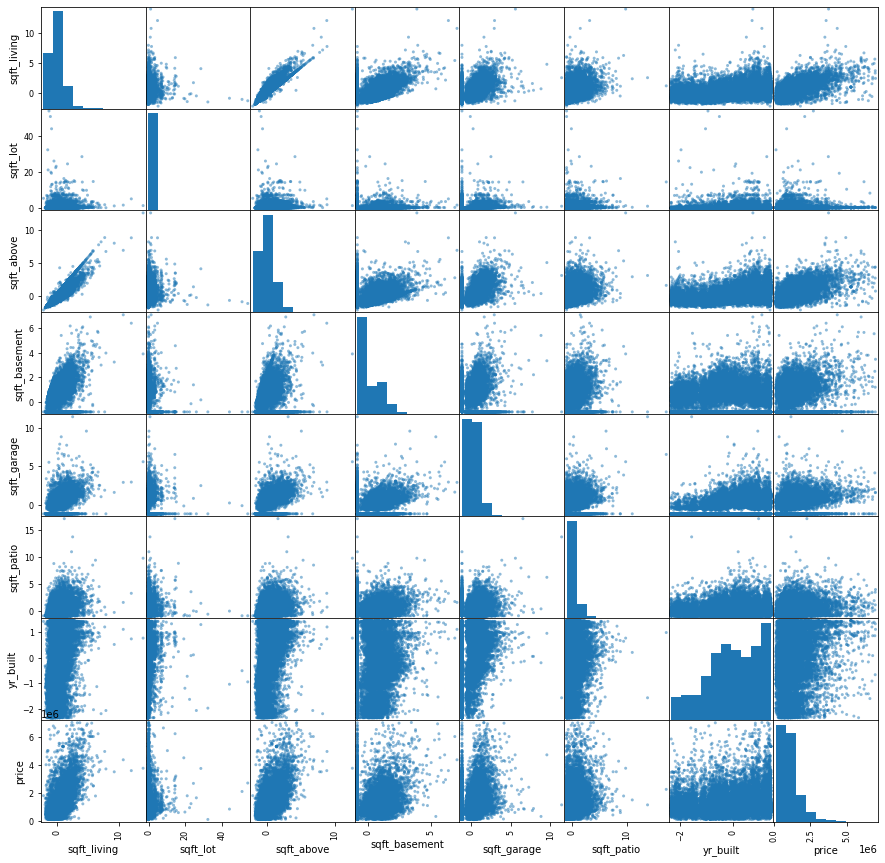

In [31]:
# Looking at a scatter matrix of just continuous numerical data
pd.plotting.scatter_matrix(df_standardized,figsize  = [15, 15]);

In [32]:
# creating baseline model based on highest .corr() to price and confirmed by scatter plot
X = df_standardized[['sqft_living']]
y = df_standardized['price']

model = sm.OLS(y, sm.add_constant(X)).fit()

In [33]:
# viewing the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 2.259e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:12:23   Log-Likelihood:            -4.3768e+05
No. Observations:               29927   AIC:                         8.754e+05
Df Residuals:                   29925   BIC:                         8.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.085e+06   3142.486    345.234      0.000    1.08e+06    1.09e+06
sqft_living  4.724e+05   3142.538    150.309      0.000    4.66e+05    4.79e+05
==============================================================================
Omnibus:                    15009.122   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           199931.135
Skew:                           2.091   Prob(JB):                         0.00
Kurtosis:                      14.952   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I'm converting the standardizing back into regular interpretation so that its easier to understand

In [34]:
model.params["sqft_living"] / df["sqft_living"].std()

485.234465172104

Results of standardized baseline model:
- Our model explains 43% of the variance in price
- The model is overall statistically significant
- The coefs for constant and sqft living is stat sig

- for a house with average sq ft of living area, we would expect a home value of \\$1,085,000
- for every increase in 1 sq ft from the average, we would expect a price increase of \\$485
- for every decrease in 1 sq ft from the average, we would expect a price decrease of $485

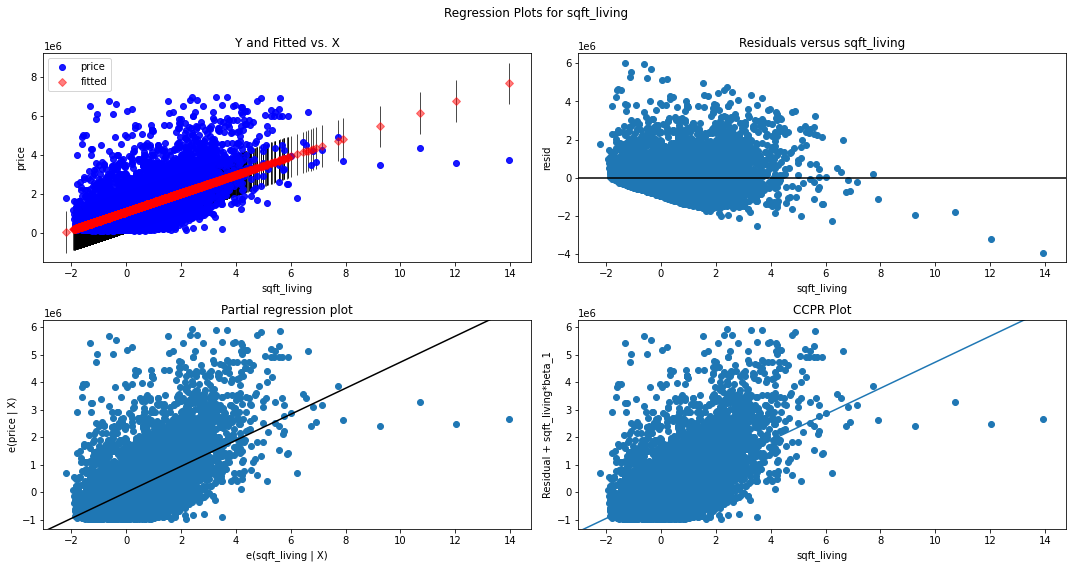

In [65]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

# Below is a test, do not pay attentions

Price looks to be incredibly right skewed, lets blow that one up for a closer look

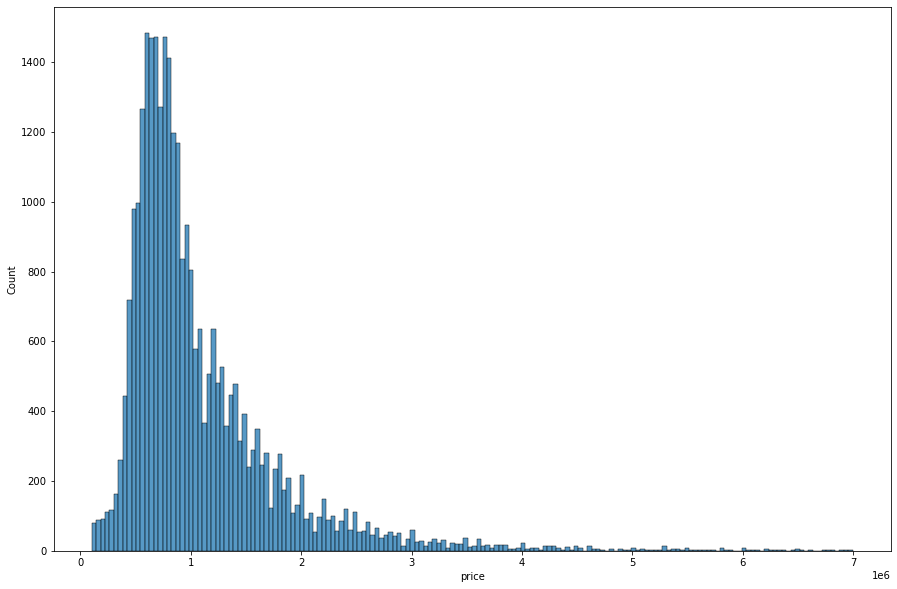

In [35]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(df_numeric['price'], bins = int(np.sqrt(len(df_numeric['price']))));

If we log the saleprice, does that make it look any more normal?

In [36]:
y_log = np.log(y)
X = df_numeric[['sqft_living']]

log_model = sm.OLS(y_log, sm.add_constant(X)).fit()

In [37]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:13:16   Log-Likelihood:                -16792.
No. Observations:               29927   AIC:                         3.359e+04
Df Residuals:                   29925   BIC:                         3.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9649      0.006   2176.234      0.000      12.953      12.977
sqft_living     0.0004   2.58e-06    142.111      0.000       0.000       0.000
==============================================================================
Omnibus:                     2324.497   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8890.917
Skew:                          -0.324   Prob(JB):                         0.00
Kurtosis:                       5.590   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

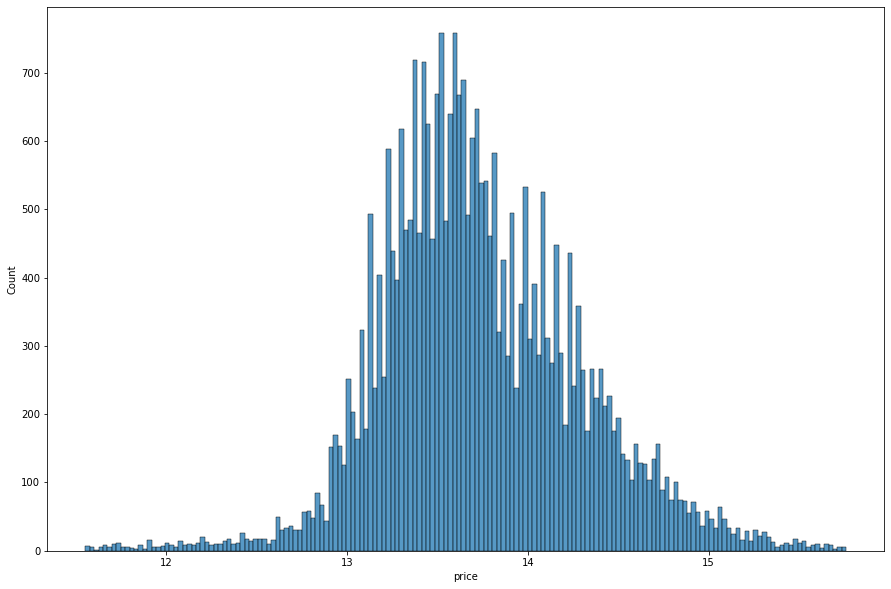

In [38]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(y_log, bins = int(np.sqrt(len(df_numeric['price']))));

It looks much more normal now. What does the coef mean?

In [39]:
(np.exp(log_model.params["sqft_living"]) - 1) * 100

0.036659010941098025

For each increase of 1 sq ft, we see an associated change of .0367% in price

# I'm going to leave the logged where it is for now and look at categorical data

In [40]:
df_all_cat.head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,4,1.0,1.0
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,5,2.5,1.0
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,6,2.0,1.0
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,3,3.0,2.0
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0


Let's look at reducing some of these based on the column descriptions:
- Waterfront: remove, we cannot change the house location to be moved next to water
- Greenbelt: remove, we cannot change the house location to be moved next to a greenbelt
- View: remove, we cannot change the house location to have a good view

In [41]:
df_all_cat_reduced = df_all_cat.drop(['waterfront', 'greenbelt', 'view'], axis=1).copy()

In [42]:
df_all_cat_reduced

,nuisance,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors
0,NO,Good,7 Average,Gas,PUBLIC,4,1.0,1.0
1,YES,Average,7 Average,Oil,PUBLIC,5,2.5,1.0
2,NO,Average,7 Average,Gas,PUBLIC,6,2.0,1.0
3,NO,Average,9 Better,Gas,PUBLIC,3,3.0,2.0
4,YES,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0
...,...,...,...,...,...,...,...,...
30150,NO,Good,8 Good,Oil,PUBLIC,5,2.0,1.5
30151,NO,Average,7 Average,Gas,PUBLIC,3,2.0,2.0
30152,YES,Average,7 Average,Gas,PUBLIC,3,2.0,1.0
30153,NO,Average,8 Good,Gas,PUBLIC,3,2.5,2.0


What can be changed about each of the remaining?
- nuisance: improve sound damping in house (thicker insulation/windows) or install shrubs/large fence to mute noise
- condition (overall condition related to maintenance): paint house, do some landscaping
- heat_source: upgrade/change your heat source

## Creating a function to test all of the categories

In [43]:
def check_for_category(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(temp_list):
        z = i+1
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df_numeric['price']
    X_cat = df_all_cat_reduced[[category_column]].copy()
    X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

In [44]:
def check_for_category_log(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    
    for i, category in enumerate(temp_list):
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = np.log(df_numeric['price'])
    X_cat = df_all_cat_reduced[[category_column]].copy()
    X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

## Lets start with the condition of the house

### Here's what the kings county website says:
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [45]:
df_all_cat_reduced['price'] = df_dropped['price']

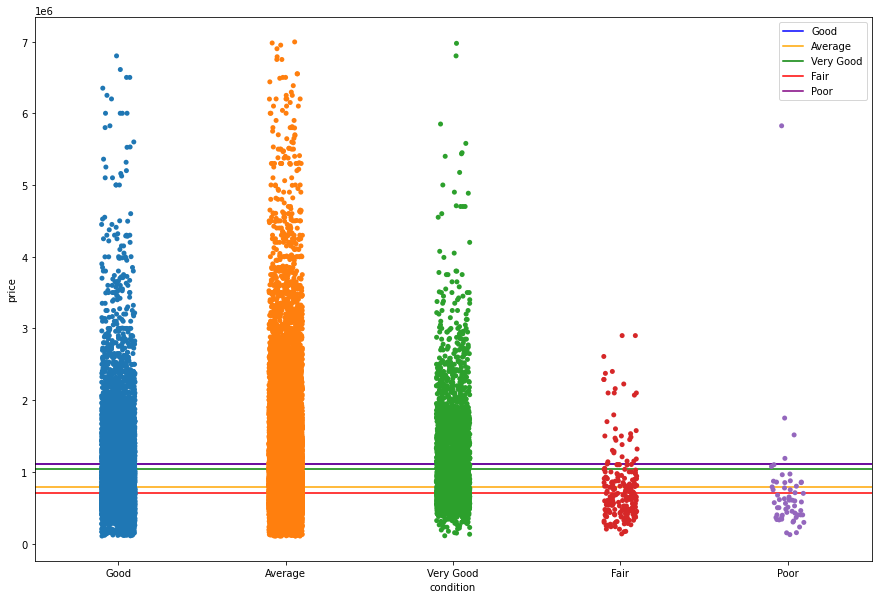

In [46]:
condition_stats, condition_results, condition_summary = check_for_category('condition')

In [ ]:
condition_stats

In [47]:
condition_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     4542.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:13:59   Log-Likelihood:            -4.3765e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29921   BIC:                         8.754e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.073e+04   8254.337      2.512      0.012    4555.255    3.69e+04
sqft_living           498.5277      3.321    150.105      0.000     492.018     505.037
condition_Fair       1.889e+04   3.66e+04      0.517      0.605   -5.28e+04    9.06e+04
condition_Good       1.969e+04   7289.198      2.701      0.007    5400.152     3.4e+04
condition_Poor       3.124e+04   7.09e+04      0.441      0.659   -1.08e+05     1.7e+05
condition_Very Good  8.451e+04   1.04e+04      8.160      0.000    6.42e+04    1.05e+05
==============================================================================
Omnibus:                    15073.352   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202490.729
Skew:                           2.100   Prob(JB):                         0.00
Kurtosis:                      15.031   Cond. No.                     5.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ok, not a lot of good info here just yet. Lets try looking at nuisance?

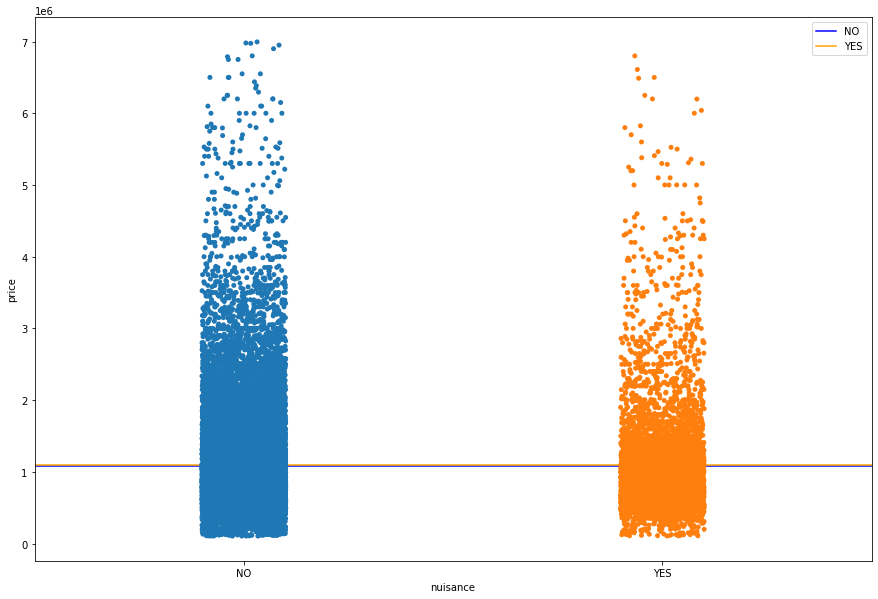

In [82]:
nuisance_stats, nuisance_results, nuisance_summary = check_for_category('nuisance')

In [83]:
nuisance_stats

,count,mean,std,min,25%,50%,75%,max
nuisance,,,,,,,,
NO,24736.0,1.083473e+06,708996.290375,104186.0,650000.0,862000.0,1300000.0,6995000.0
YES,5191.0,1.091659e+06,771224.184910,106088.0,650000.0,850000.0,1275000.0,6800000.0


In [84]:
nuisance_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.139e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:52:00   Log-Likelihood:            -4.3763e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29924   BIC:                         8.753e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.936e+04   7849.523      2.466      0.014    3974.007    3.47e+04
sqft_living    499.0550      3.307    150.927      0.000     492.574     505.536
nuisance_YES  8.588e+04   8300.703     10.346      0.000    6.96e+04    1.02e+05
==============================================================================
Omnibus:                    14941.703   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197937.637
Skew:                           2.081   Prob(JB):                         0.00
Kurtosis:                      14.892   Cond. No.                     6.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OK, model is not much better and this is telling us that the price goes up based on having a nuisance so that doesnt look right

## Heatsource?

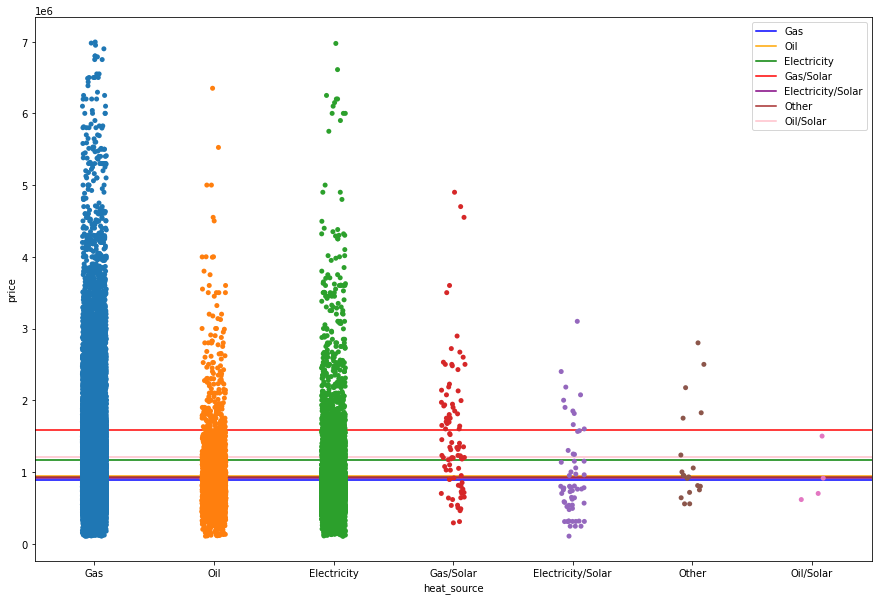

In [85]:
heat_stats, heat_results, heat_summary = check_for_category('heat_source')

In [86]:
heat_stats

,count,mean,std,min,25%,50%,75%,max
heat_source,,,,,,,,
Electricity,6419.0,8.891168e+05,565183.630323,104186.0,589900.00,750000.0,995700.00,6975000.0
Electricity/Solar,59.0,9.381008e+05,627059.661577,104920.0,526000.00,765000.0,1197500.00,3100000.0
Gas,20459.0,1.169025e+06,769020.328541,104725.0,675000.00,925000.0,1425000.00,6995000.0
Gas/Solar,90.0,1.585248e+06,909409.573458,290043.0,968104.25,1375000.0,1942576.75,4900000.0
Oil,2877.0,9.101851e+05,515491.372212,104946.0,605000.00,810000.0,1050000.00,6350000.0
Oil/Solar,4.0,9.321750e+05,398861.616562,615000.0,678750.00,806850.0,1060275.00,1500000.0
Other,19.0,1.205713e+06,672109.909835,555000.0,775000.00,950000.0,1493000.00,2800000.0


In [87]:
heat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     3236.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:53:12   Log-Likelihood:            -4.3766e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29919   BIC:                         8.754e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3.112e+04   9007.766      3.454      0.001    1.35e+04    4.88e+04
sqft_living                     498.2769      3.443    144.731      0.000     491.529     505.025
heat_source_Electricity/Solar -7.428e+04   7.11e+04     -1.045      0.296   -2.14e+05     6.5e+04
heat_source_Gas                 283.3043   8009.981      0.035      0.972   -1.54e+04     1.6e+04
heat_source_Gas/Solar          2.435e+05   5.78e+04      4.216      0.000     1.3e+05    3.57e+05
heat_source_Oil                4.027e+04   1.22e+04      3.303      0.001    1.64e+04    6.42e+04
heat_source_Oil/Solar         -2.698e+04   2.72e+05     -0.099      0.921    -5.6e+05    5.06e+05
heat_source_Other               2.04e+05   1.25e+05      1.634      0.102   -4.07e+04    4.49e+05
==============================================================================
Omnibus:                    15005.333   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200361.421
Skew:                           2.090   Prob(JB):                         0.00
Kurtosis:                      14.967   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### How about bedrooms?

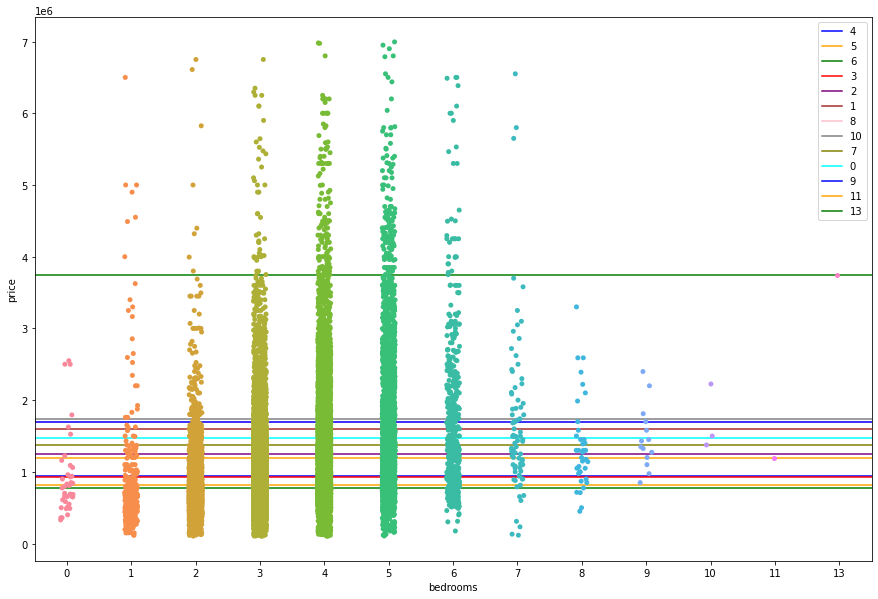

In [88]:
bedrooms_stats, bedroom_results, bedroom_summary = check_for_category('bedrooms')

In [89]:
bedrooms_stats

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0,38.0,9.352789e+05,5.762020e+05,330000.0,591250.0,787500.0,1035000.00,2550000.0
1,377.0,8.163302e+05,7.624051e+05,114491.0,480000.0,611250.0,825000.00,6500000.0
2,3897.0,7.683254e+05,4.133541e+05,104946.0,550000.0,700000.0,860000.00,6750000.0
3,12690.0,9.237611e+05,5.239845e+05,104186.0,600000.0,800000.0,1100000.00,6750000.0
4,9545.0,1.253018e+06,7.591983e+05,104725.0,740000.0,1020000.0,1560001.00,6980000.0
5,2758.0,1.597196e+06,1.030503e+06,106088.0,859962.5,1305997.5,2000000.00,6995000.0
6,488.0,1.691782e+06,1.133136e+06,175000.0,879000.0,1350000.0,2115456.75,6500000.0
7,78.0,1.736958e+06,1.148083e+06,116523.0,1085000.0,1472500.0,2063750.25,6550000.0
8,37.0,1.370617e+06,6.245883e+05,450000.0,1000000.0,1275000.0,1500000.00,3300000.0


In [90]:
bedroom_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1852.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:54:05   Log-Likelihood:            -4.3726e+05
No. Observations:               29927   AIC:                         8.745e+05
Df Residuals:                   29913   BIC:                         8.747e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.335e+05   8.71e+04      2.679      0.007    6.27e+04    4.04e+05
sqft_living   566.6520      4.316    131.281      0.000     558.192     575.112
bedrooms_1   1.047e+05   9.13e+04      1.147      0.251   -7.42e+04    2.84e+05
bedrooms_2  -1.551e+05   8.74e+04     -1.775      0.076   -3.26e+05    1.62e+04
bedrooms_3  -3.172e+05   8.71e+04     -3.640      0.000   -4.88e+05   -1.46e+05
bedrooms_4  -4.254e+05   8.73e+04     -4.871      0.000   -5.97e+05   -2.54e+05
bedrooms_5  -4.402e+05    8.8e+04     -5.004      0.000   -6.13e+05   -2.68e+05
bedrooms_6  -5.225e+05   9.08e+04     -5.753      0.000   -7.01e+05   -3.45e+05
bedrooms_7  -6.289e+05   1.07e+05     -5.898      0.000   -8.38e+05    -4.2e+05
bedrooms_8  -7.727e+05   1.24e+05     -6.223      0.000   -1.02e+06   -5.29e+05
bedrooms_9  -9.317e+05   1.68e+05     -5.546      0.000   -1.26e+06   -6.02e+05
bedrooms_10 -1.262e+06   3.22e+05     -3.921      0.000   -1.89e+06   -6.31e+05
bedrooms_11 -4.274e+05   5.43e+05     -0.787      0.431   -1.49e+06    6.37e+05
bedrooms_13 -5.187e+06   5.47e+05     -9.491      0.000   -6.26e+06   -4.12e+06
==============================================================================
Omnibus:                    14529.134   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187417.615
Skew:                           2.014   Prob(JB):                         0.00
Kurtosis:                      14.579   Cond. No.                     4.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Below is me running bedrooms as a numeric instead of a categorical

In [91]:
y = df_numeric['price']
X_test = df_all_cat_reduced[['bedrooms']].copy()
X_test['sqft_living'] = df_numeric['sqft_living'].copy()

test_results = sm.OLS(endog = y, exog = sm.add_constant(X_test)).fit()
    
# get a summary of the model
test_summary = test_results.summary()

In [92]:
test_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.185e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:54:50   Log-Likelihood:            -4.3737e+05
No. Observations:               29927   AIC:                         8.747e+05
Df Residuals:                   29924   BIC:                         8.748e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.502e+05   1.13e+04     22.142      0.000    2.28e+05    2.72e+05
bedrooms    -1.044e+05   4146.934    -25.174      0.000   -1.13e+05   -9.63e+04
sqft_living   565.7608      4.264    132.693      0.000     557.404     574.118
==============================================================================
Omnibus:                    14698.037   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           194650.348
Skew:                           2.036   Prob(JB):                         0.00
Kurtosis:                      14.812   Cond. No.                     8.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Lets look at how the numerical data is going - looking at multicollinearity

checking for multicolinearity

In [93]:
df_numeric.corr()['price']

price            1.000000
sqft_living      0.655892
sqft_lot         0.096905
sqft_above       0.583745
sqft_basement    0.238018
sqft_garage      0.296795
sqft_patio       0.309581
yr_built         0.106209
Name: price, dtype: float64

In [94]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

new_df=df_numeric.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
new_df['pairs'] = list(zip(new_df.level_0, new_df.level_1))

# set index to pairs
new_df.set_index(['pairs'], inplace = True)

#drop level columns
new_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
new_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
new_df.drop_duplicates(inplace=True)


In [95]:
new_df[(new_df.cc>.75) & (new_df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.881432


will drop sqft_above since sq ft living has the highest correlation to price

In [96]:
df_numeric.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,675000.0,1180,7140,1180,0,0,40,1969
1,920000.0,2770,6703,1570,1570,0,240,1950
2,311000.0,2880,6156,1580,1580,0,0,1956
3,775000.0,2160,1400,1090,1070,200,270,2010
4,592500.0,1120,758,1120,550,550,30,2012


In [97]:
y= df_numeric['price']
X_multi = df_numeric.drop(['price', 'sqft_above'], axis=1)

X_standardized = X_multi.copy()

for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) / X_standardized[col].std()
    
# X_standardized.describe()


results_multi = sm.OLS(endog = y, exog = sm.add_constant(X_standardized)).fit()

results_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     3961.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:56:14   Log-Likelihood:            -4.3735e+05
No. Observations:               29927   AIC:                         8.747e+05
Df Residuals:                   29920   BIC:                         8.748e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.085e+06   3108.107    349.053      0.000    1.08e+06    1.09e+06
sqft_living    4.822e+05   4124.666    116.913      0.000    4.74e+05     4.9e+05
sqft_lot       4422.7780   3166.379      1.397      0.162   -1783.462    1.06e+04
sqft_basement -9446.4723   3561.650     -2.652      0.008   -1.64e+04   -2465.485
sqft_garage   -1.163e+04   3887.837     -2.990      0.003   -1.92e+04   -4006.006
sqft_patio     4.898e+04   3421.125     14.318      0.000    4.23e+04    5.57e+04
yr_built      -6.943e+04   3709.823    -18.716      0.000   -7.67e+04   -6.22e+04
==============================================================================
Omnibus:                    14843.048   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202639.385
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      15.069   Cond. No.                         2.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Now running categories along with multilinear regression

In [98]:
def check_for_category_multi(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(temp_list):
        z = i+1
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df_numeric['price']
    X_cat = X_standardized.copy()
    X_cat[category_column] = df_all_cat_reduced[[category_column]].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

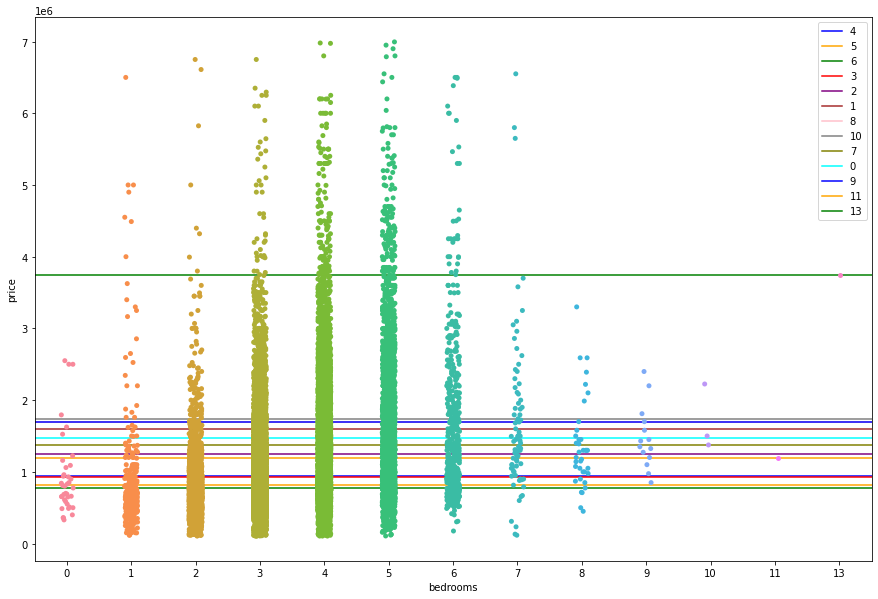

In [99]:
bed_multi_stats, bed_multi_results, bed_multi_summary = check_for_category_multi('bedrooms')

In [100]:
bed_multi_stats

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0,38.0,9.352789e+05,5.762020e+05,330000.0,591250.0,787500.0,1035000.00,2550000.0
1,377.0,8.163302e+05,7.624051e+05,114491.0,480000.0,611250.0,825000.00,6500000.0
2,3897.0,7.683254e+05,4.133541e+05,104946.0,550000.0,700000.0,860000.00,6750000.0
3,12690.0,9.237611e+05,5.239845e+05,104186.0,600000.0,800000.0,1100000.00,6750000.0
4,9545.0,1.253018e+06,7.591983e+05,104725.0,740000.0,1020000.0,1560001.00,6980000.0
5,2758.0,1.597196e+06,1.030503e+06,106088.0,859962.5,1305997.5,2000000.00,6995000.0
6,488.0,1.691782e+06,1.133136e+06,175000.0,879000.0,1350000.0,2115456.75,6500000.0
7,78.0,1.736958e+06,1.148083e+06,116523.0,1085000.0,1472500.0,2063750.25,6550000.0
8,37.0,1.370617e+06,6.245883e+05,450000.0,1000000.0,1275000.0,1500000.00,3300000.0


In [101]:
bed_multi_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1403.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:59:10   Log-Likelihood:            -4.3694e+05
No. Observations:               29927   AIC:                         8.739e+05
Df Residuals:                   29908   BIC:                         8.741e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.482e+06   8.62e+04     17.186      0.000    1.31e+06    1.65e+06
sqft_living    5.499e+05   4966.807    110.718      0.000     5.4e+05     5.6e+05
sqft_lot      -3050.1489   3141.094     -0.971      0.332   -9206.830    3106.532
sqft_basement -8383.3939   3521.952     -2.380      0.017   -1.53e+04   -1480.216
sqft_garage   -4601.2490   3904.093     -1.179      0.239   -1.23e+04    3050.941
sqft_patio     4.202e+04   3392.565     12.387      0.000    3.54e+04    4.87e+04
yr_built      -7.451e+04   3675.665    -20.271      0.000   -8.17e+04   -6.73e+04
bedrooms_1     1.262e+04   9.04e+04      0.140      0.889   -1.65e+05     1.9e+05
bedrooms_2    -2.167e+05   8.65e+04     -2.503      0.012   -3.86e+05    -4.7e+04
bedrooms_3    -3.703e+05   8.63e+04     -4.290      0.000   -5.39e+05   -2.01e+05
bedrooms_4    -4.776e+05   8.65e+04     -5.519      0.000   -6.47e+05   -3.08e+05
bedrooms_5    -4.994e+05   8.72e+04     -5.729      0.000    -6.7e+05   -3.29e+05
bedrooms_6    -6.067e+05      9e+04     -6.740      0.000   -7.83e+05    -4.3e+05
bedrooms_7    -7.468e+05   1.06e+05     -7.066      0.000   -9.54e+05    -5.4e+05
bedrooms_8    -8.625e+05   1.23e+05     -7.013      0.000    -1.1e+06   -6.21e+05
bedrooms_9    -1.035e+06   1.66e+05     -6.224      0.000   -1.36e+06   -7.09e+05
bedrooms_10   -1.326e+06   3.19e+05     -4.163      0.000   -1.95e+06   -7.02e+05
bedrooms_11   -4.311e+05   5.37e+05     -0.802      0.422   -1.48e+06    6.22e+05
bedrooms_13   -5.693e+06   5.41e+05    -10.519      0.000   -6.75e+06   -4.63e+06
==============================================================================
Omnibus:                    14420.663   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           191579.023
Skew:                           1.984   Prob(JB):                         0.00
Kurtosis:                      14.743   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ignore everything below here

In [118]:
df_all_cat_reduced['bathrooms'].value_counts()

2.5     8435
2.0     7312
1.0     4526
3.0     4105
3.5     2248
1.5     1800
4.0      643
4.5      517
5.0      137
5.5       97
6.0       37
0.0       24
6.5       19
7.5        9
7.0        8
0.5        5
9.5        2
8.0        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64

In [119]:
df_all_cat_reduced.columns

Index(['nuisance', 'condition', 'grade', 'heat_source', 'sewer_system',
       'bedrooms', 'bathrooms', 'floors', 'price'],
      dtype='object')

In [120]:
remove_smalls = df_all_cat_reduced.copy()

for col in remove_smalls.columns:
    remove_smalls[col].value_counts()[remove_smalls[col].value_counts() < 10]
# 1. Shows the cats that don’t make the cutoff of 10 
    to_replace = remove_smalls[col].value_counts()[remove_smalls[col].value_counts() < 10].index.values
# 2. Creates an array of just the col items with counts below 10
    remove_smalls.replace(to_replace, value="other", inplace=True)
# 3. replaces the name for everything in to_replace with 'other'

In [121]:
remove_smalls['bathrooms'].value_counts()

2.5      8435
2.0      7312
1.0      4526
3.0      4105
3.5      2248
1.5      1800
4.0       643
4.5       517
5.0       137
5.5        97
6.0        37
other      27
0.0        24
6.5        19
Name: bathrooms, dtype: int64

In [105]:
remove_smalls = df_all_cat_reduced.copy()
remove_smalls['bedrooms'].value_counts()[remove_smalls['bedrooms'].value_counts() < 10]
to_replace = remove_smalls['bedrooms'].value_counts()[remove_smalls['bedrooms'].value_counts() < 10].index.values
remove_smalls.replace(to_replace, value="other", inplace=True)

In [106]:
remove_smalls['bedrooms'].value_counts()

3        12690
4         9545
2         3897
5         2758
6          488
1          377
7           78
0           38
8           37
9           14
other        5
Name: bedrooms, dtype: int64

# Resetting all categorical stuff and trying it again with my 
# reduced_smalls function

In [78]:
df_all_cat_reduced

,nuisance,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors,price
0,NO,Good,7 Average,Gas,PUBLIC,4,1.0,1.0,675000.0
1,YES,Average,7 Average,Oil,PUBLIC,5,2.5,1.0,920000.0
2,NO,Average,7 Average,Gas,PUBLIC,6,2.0,1.0,311000.0
3,NO,Average,9 Better,Gas,PUBLIC,3,3.0,2.0,775000.0
4,YES,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0,592500.0
...,...,...,...,...,...,...,...,...,...
30150,NO,Good,8 Good,Oil,PUBLIC,5,2.0,1.5,1555000.0
30151,NO,Average,7 Average,Gas,PUBLIC,3,2.0,2.0,1313000.0
30152,YES,Average,7 Average,Gas,PUBLIC,3,2.0,1.0,800000.0
30153,NO,Average,8 Good,Gas,PUBLIC,3,2.5,2.0,775000.0


In [99]:
# remove_smalls = df_all_cat_reduced.drop(['price'], axis=1).copy()


# this is still buggy and changes more than it should for some reason

remove_smalls = df_all_cat_reduced.copy()



for col in remove_smalls.columns:
    remove_smalls[col].value_counts()[remove_smalls[col].value_counts() < 10]
# 1. Shows the cats that don’t make the cutoff of 10 
    to_replace = remove_smalls[col].value_counts()[remove_smalls[col].value_counts() < 10].index.values
# 2. Creates an array of just the col items with counts below 10
    remove_smalls = remove_smalls.replace(to_replace, value="other")
# 3. replaces the name for everything in to_replace with 'other'

In [93]:
remove_smalls = df_all_cat_reduced.copy()
remove_smalls['bedrooms'].value_counts()[remove_smalls['bedrooms'].value_counts() < 10]
to_replace = remove_smalls['bedrooms'].value_counts()[remove_smalls['bedrooms'].value_counts() < 10].index.values
to_replace = remove_smalls['bathrooms'].value_counts()[remove_smalls['bathrooms'].value_counts() < 10].index.values
remove_smalls.replace(to_replace, value="other", inplace=True)


In [100]:
to_replace

array([ 678000., 1440000., 2325000., ..., 1807500.,  936512.,  720902.])

In [101]:
remove_smalls

,nuisance,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors,price
0,NO,Good,7 Average,Gas,PUBLIC,4,1,1.0,675000
1,YES,Average,7 Average,Oil,PUBLIC,5,2.5,1.0,920000
2,NO,Average,7 Average,Gas,PUBLIC,6,2,1.0,other
3,NO,Average,9 Better,Gas,PUBLIC,3,3,2.0,775000
4,YES,Average,7 Average,Electricity,PUBLIC,2,2,2.0,other
...,...,...,...,...,...,...,...,...,...
30150,NO,Good,8 Good,Oil,PUBLIC,5,2,1.5,1.555e+06
30151,NO,Average,7 Average,Gas,PUBLIC,3,2,2.0,other
30152,YES,Average,7 Average,Gas,PUBLIC,3,2,1.0,800000
30153,NO,Average,8 Good,Gas,PUBLIC,3,2.5,2.0,775000


In [102]:
remove_smalls['bedrooms'].value_counts()

3        12690
4         9545
2         3897
5         2758
6          488
1          377
other      120
0           38
9           14
Name: bedrooms, dtype: int64

In [47]:
def simple_num_model_all_combos(df, target_var):
    
    '''
    input: dataframe of numerical features and this will run a linear regression 
    model for all columns against the input target var.
    
    return: r^2, adjusted r^2, f-stat prob, const coef, predictor coef, const p-val and predictor p-val.
    return values will be sorted in descending order based on adjusted r^2 values.
    
    Unlike usual models, target_var should be included in the same dataframe as potential x_vars.
    
    df should be a dataframe.
    target_var should be a column name in a string form.
    
    example: simple_num_model_all_combos(df_numeric, 'price')
    '''
    column = []
    r2 = []
    r2_adj = []
    f_stat_p_val = []
    const_coefs = []
    predictor_coef = []
    const_p_val = []
    predictor_p_val =[]
    
    
    for col in df:
        if col != target_var:
            X = df[[col]]
            y = df[target_var]

            model = sm.OLS(y, sm.add_constant(X)).fit()
            column.append(col)
            r2.append(model.rsquared)
            r2_adj.append(model.rsquared_adj)
            f_stat_p_val.append(model.f_pvalue)
            const_coefs.append(model.params.values[0])
            predictor_coef.append(model.params.values[1])
            const_p_val.append(model.pvalues.values[0])
            predictor_p_val.append(model.pvalues.values[1])
        else:
            continue
  
        
    col_list = [column, r2, r2_adj, f_stat_p_val, const_coefs, predictor_coef, const_p_val, predictor_p_val]
    col_list_names = ['column', 'r2', 'r2_adj', 'f_stat_p_val', 'const_coefs', 'predictor_coef', 'const_p_val', 'predictor_p_val']

    output_df = pd.DataFrame(col_list, index = col_list_names)

    output_df_transposed = output_df.T
            
    return output_df_transposed.sort_values('r2_adj', ascending=False)

In [27]:
def multi_num_model_all_combos(df, target_var):
    
    '''
    input: dataframe of numerical features and this will run all variations 
    of a linear regression model for each combination of features against the input target var.
    
    return: r^2, adjusted r^2, f-stat prob
    return values will be sorted in descending order based on adjusted r^2 values.
    
    Unlike usual models, target_var should be included in the same dataframe as potential x_vars.
    
    df should be a dataframe.
    target_var should be a column name in a string form.
    
    example: multi_num_model_all_combos(df_numeric, 'price')
    '''
    
    column = []
    r2 = []
    r2_adj = []
    f_stat_p_val = []
    const_coefs = []
    const_p_val = []

#     predictor_coef = []
#     predictor_p_val =[]
    
    list_of_combos = []
    p_value_good = []
    MAE = []
    RMSE = []
#     target_var = 'price'

    function_df = df.drop([target_var], axis=1).copy()
    for i, x in enumerate(function_df):
        list_of_combos.append(list(combinations(function_df, i+1)))
    
    for i in range(len(list_of_combos)):

        for combo in list_of_combos[i]:
            # created a temp list to hold each column name combination
            temp_list = []
            for x in combo:
                temp_list.append(x)
                X = function_df[temp_list]
                y = df[target_var]

            model = sm.OLS(y, sm.add_constant(X)).fit()
            column.append(temp_list)
            r2.append(model.rsquared)
            r2_adj.append(model.rsquared_adj)
            f_stat_p_val.append(model.f_pvalue)
            const_coefs.append(round(model.params.values[0], 4))
            const_p_val.append(round(model.pvalues.values[0], 4))
            good = 0
            for p in model.pvalues:
                total = len(model.pvalues)
                if p <= .05:
                    good += 1
            p_value_good.append((good/total)*100)
            MAE.append(mean_absolute_error(y, model.predict(sm.add_constant(X))))
            RMSE.append(mean_squared_error(y, model.predict(sm.add_constant(X)), squared=False))


#             if i == range(len(list_of_combos))[-1]:
#             for x in list_of_combos[i]:
#                 p_value_names.append(x)
                   
#             predictor_coef.append(model.params.values[1])
#             predictor_p_val.append(model.pvalues.values[1])
  
        
    col_list = [column, r2, r2_adj, f_stat_p_val, const_coefs, const_p_val, p_value_good, MAE, RMSE]
#                 , predictor_coef, predictor_p_val]
    col_list_names = ['column', 'r2', 'r2_adj', 'f_stat_p_val', 'const_coefs', 'const_p_val', '%p_val < .05', 'MAE', 'RMSE']
#                       , 'predictor_coef', 'predictor_p_val']

    output_df = pd.DataFrame(col_list, index = col_list_names)

    output_df_transposed = output_df.T
    
    output_df_transposed = output_df_transposed.sort_values('r2_adj', ascending=False).reset_index()
    
    
    top_3 = f"The top three combos are: \n\
    - {output_df_transposed['column'][0]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][0]} \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][0]}\n\
    - {output_df_transposed['column'][1]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][1]}, \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][1]}\n\
    - {output_df_transposed['column'][2]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][2]}, \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][2]}"
    
    # trying to get p_values for all coefs into the df but this is hard and i'm gonna comment this out and stop
#     for x in p_value_names:
#         for name in x:
#             output_df_transposed[f"p_val {name}"] = np.nan
            
    return output_df_transposed, print(top_3)

In [28]:
multi_df, _ = multi_num_model_all_combos(df_standardized, 'price')

The top three combos are: 
    - ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.4551532289746706 
    	- ratio of p-vals <.05: 87.5
    - ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage'] 
    	- adj_r2: 0.4528792686607833, 
    	- ratio of p-vals <.05: 85.71428571428571
    - ['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.45246408806886096, 
    	- ratio of p-vals <.05: 85.71428571428571


In [29]:
multi_df

,index,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,%p_val < .05,MAE,RMSE
0,126,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.455281,0.455153,0,-0,1,87.5,0.490698,0.738039
1,119,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.452989,0.452879,0,-0,1,85.7143,0.492241,0.73959
2,124,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.452574,0.452464,0,-0,1,85.7143,0.490926,0.73987
3,120,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.451363,0.451253,0,-0,1,85.7143,0.494116,0.740688
4,108,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.450018,0.449926,0,-0,1,83.3333,0.492762,0.741596
...,...,...,...,...,...,...,...,...,...,...
122,26,"[sqft_basement, sqft_patio]",0.127713,0.127655,0,-0,1,66.6667,0.629144,0.933947
123,0,[bedrooms],0.11369,0.11366,0,-0,1,50,0.633075,0.941425
124,6,[sqft_patio],0.0958406,0.0958104,0,-0,1,50,0.64707,0.950857
125,5,[sqft_garage],0.0880874,0.0880569,0,-0,1,50,0.651821,0.954925


In [31]:
y= df_standardized['price']
X = df_standardized[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage']]

model = sm.OLS(y, sm.add_constant(X)).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     4130.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:14:42   Log-Likelihood:                -33437.
No. Observations:               29927   AIC:                         6.689e+04
Df Residuals:                   29920   BIC:                         6.695e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.801e-17      0.004  -2.29e-14      1.000      -0.008       0.008
bedrooms         -0.1548      0.006    -27.227      0.000      -0.166      -0.144
bathrooms         0.0874      0.007     12.748      0.000       0.074       0.101
sqft_living       0.4124      0.019     22.201      0.000       0.376       0.449
sqft_above        0.3016      0.017     17.870      0.000       0.268       0.335
sqft_basement     0.1490      0.008     18.100      0.000       0.133       0.165
sqft_garage      -0.0743      0.005    -14.240      0.000      -0.085      -0.064
==============================================================================
Omnibus:                    14738.126   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200670.805
Skew:                           2.033   Prob(JB):                         0.00
Kurtosis:                      15.016   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model.params["const"] / df_numeric['price'].std()

-1.3609569182333294e-22

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y, model.predict(sm.add_constant(X)))

354496.42597504635

In [35]:
results.predict(sm.add_constant(X))

0        4.495812e+05
1        1.332542e+06
2        1.221319e+06
3        1.153812e+06
4        7.152657e+05
             ...     
30150    9.529614e+05
30151    1.109245e+06
30152    8.399040e+05
30153    1.317563e+06
30154    5.317330e+05
Length: 29927, dtype: float64